In [1]:
#%matplotlib
%matplotlib inline
import os
import numpy
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('..')

In [3]:
import gillespy2
class ToggleSwitch(gillespy2.Model):
    """ Gardner et al. Nature (1999)
    'Construction of a genetic toggle switch in Escherichia coli'
    """
    def __init__(self, parameter_values=None):
        # Initialize the model.
        gillespy2.Model.__init__(self, name="toggle_switch")
        # Parameters
        alpha1 = gillespy2.Parameter(name='alpha1', expression=1)
        alpha2 = gillespy2.Parameter(name='alpha2', expression=1)
        beta = gillespy2.Parameter(name='beta', expression="2.0")
        gamma = gillespy2.Parameter(name='gamma', expression="2.0")
        mu = gillespy2.Parameter(name='mu', expression=1.0)
        self.add_parameter([alpha1, alpha2, beta, gamma, mu])

        # Species
        U = gillespy2.Species(name='U', initial_value=10)
        V = gillespy2.Species(name='V', initial_value=10)
        self.add_species([U, V])

        # Reactions
        cu = gillespy2.Reaction(name="r1",reactants={}, products={U:1},
                propensity_function="alpha1/(1+pow(V,beta))")
        cv = gillespy2.Reaction(name="r2",reactants={}, products={V:1},
                propensity_function="alpha2/(1+pow(U,gamma))")
        du = gillespy2.Reaction(name="r3",reactants={U:1}, products={},
                rate=mu)
        dv = gillespy2.Reaction(name="r4",reactants={V:1}, products={},
                rate=mu)
        self.add_reaction([cu,cv,du,dv])
        self.timespan(numpy.linspace(0,100,101))

In [4]:
model = ToggleSwitch()

In [5]:
results = model.run(show_labels=False)

In [6]:
# If you have the deterministic solver
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver
dresults = model.run(solver=BasicODESolver, show_labels=False)

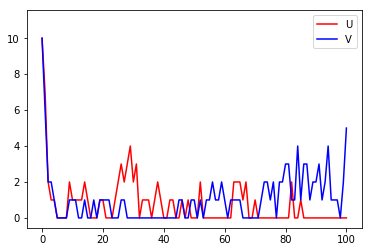

In [7]:
plt.plot(results[0][:,0],results[0][:,1],'-r', label='U')
plt.plot(results[0][:,0],results[0][:,2],'-b', label='V')
plt.plot([0],[11])
plt.legend(loc='best')

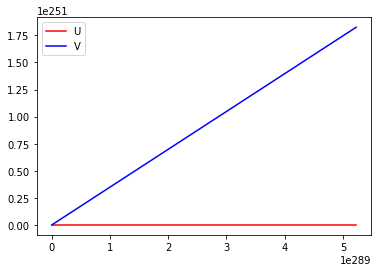

In [8]:
plt.plot(dresults[0][:,0],dresults[0][:,1],'-r', label='U')
plt.plot(dresults[0][:,0],dresults[0][:,2],'-b', label='V')
plt.plot([0],[11])
plt.legend(loc='best')

In [9]:
results

array([[[  0.,  10.,  10.],
        [  1.,   7.,   6.],
        [  2.,   2.,   2.],
        [  3.,   1.,   2.],
        [  4.,   1.,   1.],
        [  5.,   0.,   0.],
        [  6.,   0.,   0.],
        [  7.,   0.,   0.],
        [  8.,   0.,   0.],
        [  9.,   2.,   1.],
        [ 10.,   1.,   1.],
        [ 11.,   1.,   1.],
        [ 12.,   1.,   0.],
        [ 13.,   1.,   0.],
        [ 14.,   2.,   1.],
        [ 15.,   1.,   0.],
        [ 16.,   0.,   0.],
        [ 17.,   0.,   1.],
        [ 18.,   0.,   0.],
        [ 19.,   1.,   1.],
        [ 20.,   1.,   1.],
        [ 21.,   0.,   1.],
        [ 22.,   0.,   1.],
        [ 23.,   0.,   0.],
        [ 24.,   1.,   0.],
        [ 25.,   2.,   0.],
        [ 26.,   3.,   1.],
        [ 27.,   2.,   1.],
        [ 28.,   3.,   0.],
        [ 29.,   4.,   0.],
        [ 30.,   2.,   0.],
        [ 31.,   3.,   0.],
        [ 32.,   0.,   0.],
        [ 33.,   1.,   0.],
        [ 34.,   1.,   0.],
        [ 35.,   1.,

In [10]:
dresults

array([[[0.00000000e+000, 1.00000000e+001, 1.00000000e+001],
        [1.00000000e+000, 3.70104067e+000, 3.70104067e+000],
        [2.00000000e+000, 1.48248600e+000, 1.48248600e+000],
        [3.00000000e+000, 8.51904419e-001, 8.51904419e-001],
        [4.00000000e+000, 7.15806014e-001, 7.15806014e-001],
        [5.00000000e+000, 6.88866441e-001, 6.88866441e-001],
        [6.00000000e+000, 6.83602607e-001, 6.83602607e-001],
        [7.00000000e+000, 6.82576263e-001, 6.82576263e-001],
        [8.00000000e+000, 6.82376227e-001, 6.82376227e-001],
        [9.00000000e+000, 6.82337241e-001, 6.82337241e-001],
        [1.00000000e+001, 6.82329642e-001, 6.82329642e-001],
        [1.10000000e+001, 6.82328163e-001, 6.82328163e-001],
        [1.20000000e+001, 6.82327873e-001, 6.82327873e-001],
        [1.30000000e+001, 6.82327817e-001, 6.82327817e-001],
        [1.40000000e+001, 6.82327807e-001, 6.82327807e-001],
        [1.50000000e+001, 6.82327804e-001, 6.82327804e-001],
        [1.60000000e+001